In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage

from matplotlib.colors import ListedColormap
from scipy.optimize import minimize, Bounds

In [4]:
# ------ import color palettes ------
df = pd.read_excel('./palette.xlsx', sheet_name='final')
palettes = {}
for row in df.values:
    palettes[row[0]] = [row[2:5].tolist(), row[6:9].tolist(), row[10:13].tolist(), row[14:17].tolist(), row[18:].tolist()]

In [ ]:
# # ------ plot palettes ------
# fig = plt.figure(figsize=(5, 20))
# for i, (k, v) in enumerate(palettes.items()):
#     ax = fig.add_subplot(25, 2, i+1)
#     data = np.array([[0, 1, 2, 3, 4]])
#     ori_pa = (np.array(v)/255.).tolist()
#     cmap = ListedColormap(ori_pa)
#     ax.imshow(data, cmap=cmap)
#     ax.set_axis_off()
#     plt.title(k)
# plt.show()

In [18]:
print(palettes['mood of Nov 4'])

[[204, 137, 153], [206, 230, 232], [120, 102, 153], [203, 133, 204], [142, 153, 255]]


In [103]:
rgb = [[204, 137, 153], [204, 137, 153], [120, 102, 153], [120, 102, 153], [203, 133, 204]]  # 1, 1, 3, 3, 4


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def objective_function(params, inputs, w):
    L_values = params[::3]
    a_values = params[1::3]
    b_values = params[2::3]
    total_distance = 0
    for i, input_1 in enumerate(inputs):
        for j, input_2 in enumerate(inputs):
            if i != j:
                # 計算兩個 input 的歐式距離
                distance = euclidean_distance(np.array([L_values[i], a_values[i], b_values[i]]),
                                             np.array([L_values[j], a_values[j], b_values[j]]))
                # 根據距離調整 L 值
                total_distance += distance + w * np.abs(L_values[i] - L_values[j]) / euclidean_distance(np.array([L_values[i]]), np.array([L_values[j]]))
    return total_distance

# 設定 input 的 L, a, b 值
inputs = np.array(rgb)
initial_params = inputs.flatten()

# 設定調整項的權重
w = 0.1

# 最佳化求解
result = minimize(objective_function, initial_params, args=(inputs, w))
optimized_params = result.x

# 取得最佳化後的 L, a, b 值
optimized_L_values = optimized_params[::3]
optimized_a_values = optimized_params[1::3]
optimized_b_values = optimized_params[2::3]

# 印出最佳化後的結果
print("Optimized L values:", optimized_L_values)
print("Optimized a values:", optimized_a_values)
print("Optimized b values:", optimized_b_values)


# fig = plt.figure()
# ax = fig.add_subplot(111)
# data = np.array([[0, 1, 2, 3, 4]])
# ori_pa = (np.array(rgb) / 255.).tolist()
# cmap = ListedColormap(ori_pa)
# ax.imshow(data, cmap=cmap)
# ax.set_axis_off()
# plt.show()

Optimized L values: [204. 204. 120. 120. 203.]
Optimized a values: [137. 137. 102. 102. 133.]
Optimized b values: [153. 153. 153. 153. 204.]


C:\Users\ivy87\AppData\Local\Temp\ipykernel_16708\2598384070.py:19: RuntimeWarning: invalid value encountered in scalar divide
  total_distance += distance + w * np.abs(L_values[i] - L_values[j]) / euclidean_distance(np.array([L_values[i]]), np.array([L_values[j]]))


In [109]:
# 目標函式
def objective(params, inputs):
    L_values = params[::3]
    a_values = params[1::3]
    b_values = params[2::3]
    num_inputs = inputs.shape[1]
    total_distance = 0
    for i in range(num_inputs):
        L_diff = L_values[i] - inputs[0, i]
        a_diff = a_values[i] - inputs[1, i]
        b_diff = b_values[i] - inputs[2, i]
        distance = np.sqrt(L_diff ** 2 + a_diff ** 2 + b_diff ** 2)
        total_distance += distance

        # 調整亮度
        L_diff = L_values[i] - initial_params[3 * i]
        # total_distance += np.abs(L_diff) * distance * 0.01  # 調整亮度的係數為0.01
        total_distance += np.abs(L_diff) * distance / (distance + 1)

    return total_distance

# 初始值
# initial_params = np.array([50, 50, 50, 60, 70, 80, 40, 30, 20])  # L1, a1, b1, L2, a2, b2, L3, a3, b3

# 輸入值
inputs = np.array([[50, 40, 90],
                  [50, 40, 90],
                  [50, 80, 90]])
initial_params = inputs.flatten()

# 最佳化
result = minimize(objective, initial_params, args=(inputs,), method='SLSQP')
optimized_params = result.x
optimized_L_values = optimized_params[::3]
optimized_a_values = optimized_params[1::3]
optimized_b_values = optimized_params[2::3]

print("最佳化後的 L 值：", optimized_L_values)
print("最佳化後的 a 值：", optimized_a_values)
print("最佳化後的 b 值：", optimized_b_values)


最佳化後的 L 值： [49.88021251 40.00080689 89.99999965]
最佳化後的 a 值： [50.05023046 40.00034676 89.99999992]
最佳化後的 b 值： [50.10568883 80.0000672  89.99999963]


In [110]:
rgb = []
for l, a, b in zip(optimized_L_values, optimized_a_values, optimized_b_values):
    rgb.append(skimage.color.lab2rgb([l, a, b]).tolist())
print(rgb)

[[0.8090433199862719, 0.2943169271778229, 0.12938624689710868], [0.6498348468429311, 0.23894064550049843, 0.0], [1.0, 0.5173121795307551, 0.18412792583493176]]


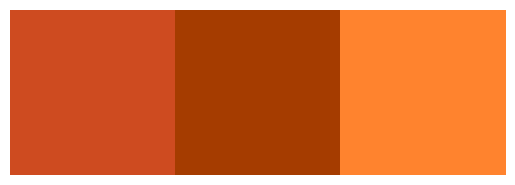

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111)
data = np.array([[0, 1, 2]])
ori_pa = rgb
cmap = ListedColormap(ori_pa)
ax.imshow(data, cmap=cmap)
ax.set_axis_off()
plt.show()

In [137]:
# 目標函式
def objective(params, inputs):
    L_values = params[::3]
    a_values = params[1::3]
    b_values = params[2::3]
    num_inputs = inputs.shape[1]
    total_distance = 0
    for i in range(num_inputs):
        L_diff = L_values[i] - inputs[0, i]
        a_diff = a_values[i] - inputs[1, i]
        b_diff = b_values[i] - inputs[2, i]
        distance = np.sqrt(L_diff ** 2 + a_diff ** 2 + b_diff ** 2)
        total_distance += distance

        # 調整亮度
        L_diff = L_values[i] - initial_params[3 * i]
        # total_distance += np.abs(L_diff) * distance * 0.01  # 調整亮度的係數為0.01
        total_distance += np.abs(L_diff) * distance / (distance + 1)

    return total_distance

# 初始值
# initial_params = np.array([50, 50, 50, 60, 70, 80, 40, 30, 20])  # L1, a1, b1, L2, a2, b2, L3, a3, b3

# 輸入值
inputs = np.array([[50, 40, 90],
                  [50, 40, 90],
                  [50, 80, 90]])
initial_params = inputs.flatten()
bounds = Bounds([0, 0, 0, -100, -100, -100, -100, -100, -100], [100, 100, 100, 100, 100, 100, 100, 100, 100])

# 最佳化
result = minimize(objective, initial_params, args=(inputs,), method='SLSQP', bounds=bounds)
optimized_params = result.x
optimized_L_values = optimized_params[::3]
optimized_a_values = optimized_params[1::3]
optimized_b_values = optimized_params[2::3]

print("最佳化後的 L 值：", optimized_L_values)
print("最佳化後的 a 值：", optimized_a_values)
print("最佳化後的 b 值：", optimized_b_values)


最佳化後的 L 值： [50.00900107 39.99934896 90.00046593]
最佳化後的 a 值： [49.98645394 40.00100875 89.99976015]
最佳化後的 b 值： [50.00088296 79.99968726 90.00004809]


d:\NTU\Icon\colorTransform\.venv\lib\site-packages\scipy\optimize\_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
